In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../data/raw/atp_tennis.csv")

# Ver primeras filas
df.head()

# Revisar columnas y tipos de datos
df.info()

# Resumen estadístico
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66227 entries, 0 to 66226
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tournament  66227 non-null  object 
 1   Date        66227 non-null  object 
 2   Series      66227 non-null  object 
 3   Court       66227 non-null  object 
 4   Surface     66227 non-null  object 
 5   Round       66227 non-null  object 
 6   Best of     66227 non-null  int64  
 7   Player_1    66227 non-null  object 
 8   Player_2    66227 non-null  object 
 9   Winner      66227 non-null  object 
 10  Rank_1      66227 non-null  int64  
 11  Rank_2      66227 non-null  int64  
 12  Pts_1       66227 non-null  int64  
 13  Pts_2       66227 non-null  int64  
 14  Odd_1       66227 non-null  float64
 15  Odd_2       66227 non-null  float64
 16  Score       66227 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 8.6+ MB


,Best of,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2
count,66227.000000,66227.000000,66227.000000,66227.000000,66227.000000,66227.000000,66227.000000
mean,3.380117,75.908814,75.616154,1129.716400,1134.998067,2.413623,2.411092
std,0.784700,100.634490,101.072241,1717.260733,1741.582543,2.661958,2.644131
min,3.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.000000,24.000000,25.000000,105.000000,108.500000,1.333000,1.333000
50%,3.000000,54.000000,54.000000,698.000000,698.000000,1.730000,1.800000
75%,3.000000,92.000000,92.000000,1244.000000,1249.000000,2.750000,2.750000
max,5.000000,3390.000000,4915.000000,16950.000000,16950.000000,67.000000,51.000000


In [29]:
df["Player_1"].value_counts()

Player_1
Federer R.     668
Nadal R.       619
Djokovic N.    602
Ferrer D.      539
Gasquet R.     482
              ... 
Zahraj P.        1
Monday J.        1
Tarvet O.        1
Gomez F.A.       1
Jacquet K.       1
Name: count, Length: 1504, dtype: int64

In [5]:
# Verificar valores nulos
df.isnull().sum()

Tournament    0
Date          0
Series        0
Court         0
Surface       0
Round         0
Best of       0
Player_1      0
Player_2      0
Winner        0
Rank_1        0
Rank_2        0
Pts_1         0
Pts_2         0
Odd_1         0
Odd_2         0
Score         0
dtype: int64

### Ganadores de los ultimos 5 años

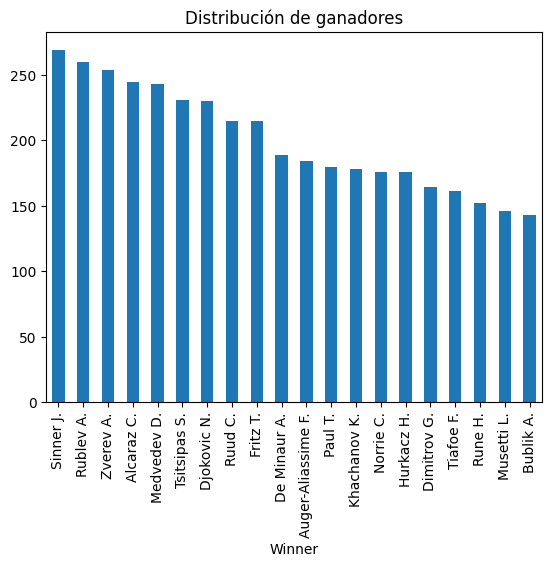

In [16]:
years = [2020, 2021, 2022, 2023,2024,2025]
from2020_df = df[df['Date'].str[:4].astype(int).isin(years)]
# from2020_df_clay = from2020_df[from2020_df['Surface'] == 'Clay']   
from2020_df['Winner'].value_counts().head(20).plot(kind='bar')
plt.title("Distribución de ganadores")
plt.show()

### Ganadores finales 2025

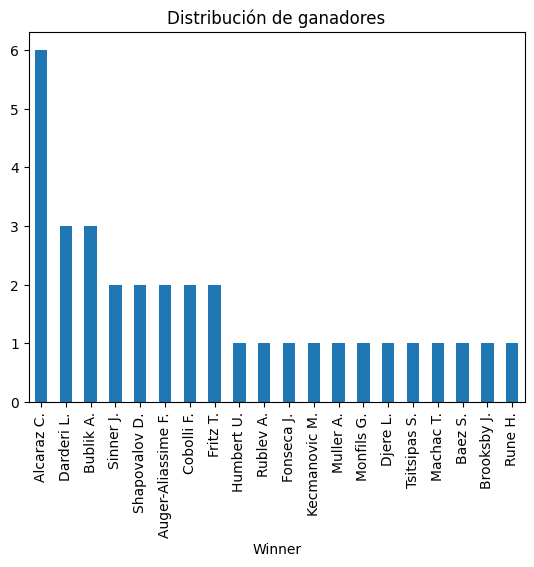

In [19]:
years = [2025]
from2020_df = df[df['Date'].str[:4].astype(int).isin(years)]
from2020_df_finals = from2020_df[from2020_df['Round'] == 'The Final']   
from2020_df_finals['Winner'].value_counts().head(20).plot(kind='bar')
plt.title("Distribución de ganadores")
plt.show()

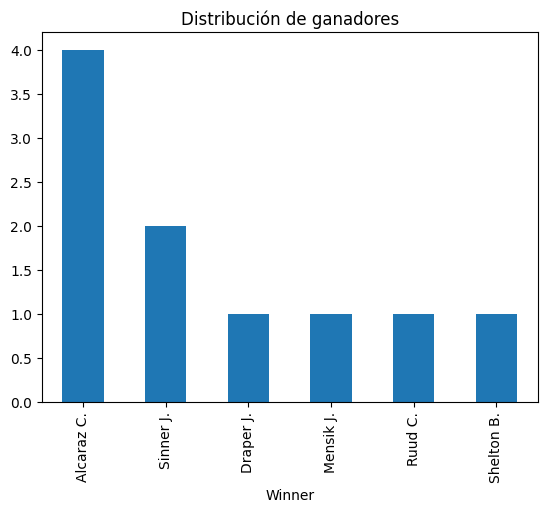

In [26]:
tournaments = ['Masters 1000', 'Grand Slam']

from2020_df_finals_masters_and_grand_slam = from2020_df_finals[(from2020_df_finals['Series'].isin(tournaments))]
from2020_df_finals_masters_and_grand_slam['Winner'].value_counts().plot(kind='bar')
plt.title("Distribución de ganadores")
plt.show()

### SUPERFICIES

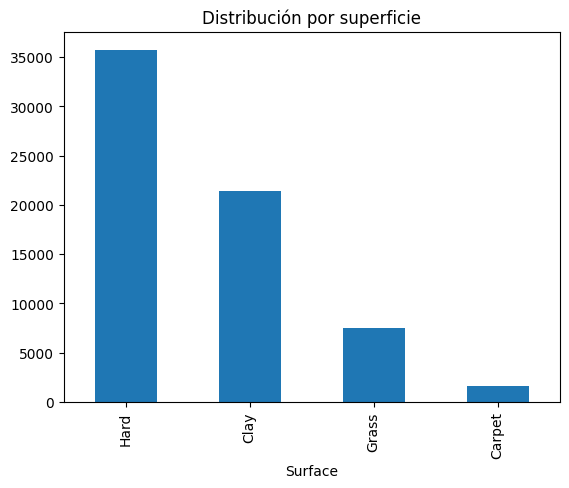

In [9]:
df['Surface'].value_counts().plot(kind='bar')
plt.title("Distribución por superficie")
plt.show()

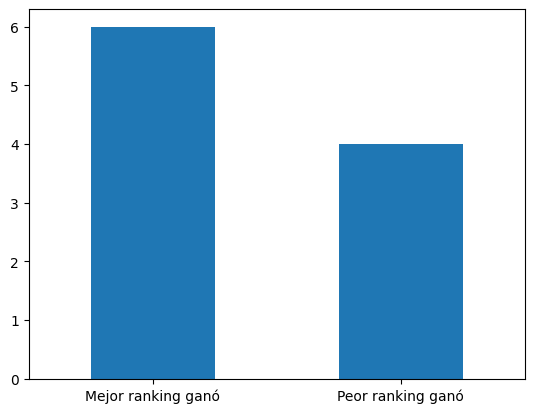

In [35]:
df = from2020_df_finals_masters_and_grand_slam
upset_mask = (
    ((df['Winner']==df['Player_1']) & (df['Rank_1'] > df['Rank_2'])) |
    ((df['Winner']==df['Player_2']) & (df['Rank_2'] > df['Rank_1']))
)

upset_mask.value_counts().plot(kind='bar')
plt.xticks([0,1], ['Mejor ranking ganó', 'Peor ranking ganó'], rotation=0)
plt.show()